## Making Products Count: Data Science for Product Managers
Name: Vallabh Gajanan Karanjkar (vkaranjk)
HW 3: Natural Language Processing

In [179]:
import pandas as pd
import numpy as np
from datetime import datetime
from matplotlib import pyplot as plt 

import re
import spacy

from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from collections import Counter

from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

## 1. Exploratory Data Analysis: Checking for null values and mean, median of the numeric values to understand the distribution of data points

In [180]:
dataframe = pd.read_csv("Twitter-sentiment-self-drive-DFE.csv")
dataframe

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,our_id,sentiment_gold,sentiment_gold_reason,text
0,724227031,True,golden,236,NaN,5,0.7579,10001,5\n4,Author is excited about the development of the...,Two places I'd invest all my money if I could:...
1,724227032,True,golden,231,NaN,5,0.8775,10002,5\n4,Author is excited that driverless cars will be...,Awesome! Google driverless cars will help the ...
2,724227033,True,golden,233,NaN,2,0.6805,10003,2\n1,The author is skeptical of the safety and reli...,If Google maps can't keep up with road constru...
3,724227034,True,golden,240,NaN,2,0.8820,10004,2\n1,The author is skeptical of the project's value.,Autonomous cars seem way overhyped given the t...
4,724227035,True,golden,240,NaN,3,1.0000,10005,3,Author is making an observation without expres...,Just saw Google self-driving car on I-34. It w...
...,...,...,...,...,...,...,...,...,...,...,...
7151,726942339,True,golden,65,NaN,not_relevant,0.5616,10073,not_relevant,Trains (metros) are not relevant to the focus ...,Washington DC metro trains are all self-drivin...
7152,726942340,True,golden,71,NaN,not_relevant,0.7293,10074,not_relevant,Outside the scope of the task,I think #DARPA works on autonomous drone techn...
7153,726942341,True,golden,63,NaN,not_relevant,0.8854,10075,not_relevant,Outside the scope of the task,I love the idea of driving myself to the denti...
7154,726942342,True,golden,67,NaN,not_relevant,0.8431,10076,not_relevant,Outside the scope of the task,Who likes cars these days? No me. Too expensiv...


In [181]:
dataframe.drop(columns=["_unit_state", "sentiment_gold", "sentiment_gold_reason"], inplace=True)
#Dropping the columns which are not required

In [182]:
#Descriptive Statistics
dataframe.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,our_id
count,7.156000e+03,7156.000000,7156.000000,7156.000000
mean,7.243474e+08,5.834405,0.774654,3609.930548
std,2.506742e+05,11.144930,0.205363,2140.401611
min,7.242270e+08,1.000000,0.248000,1.000000
25%,7.243229e+08,3.000000,0.630600,1789.750000
50%,7.243247e+08,4.000000,0.753100,3578.500000
75%,7.243265e+08,8.000000,1.000000,5367.250000
max,7.269423e+08,241.000000,1.000000,10077.000000


From the descriptive statistics it is evident that there are few outliers considering the trusted_judgement columns where the mean is around 5.8 the max value is 241, which could be an outlier. 

In [183]:
#Remove the outlier from dataframe
dataframe = dataframe[dataframe["_trusted_judgments"]<8]

Treated the outlier by removing the data elements where trusted_judgements are greater than 8

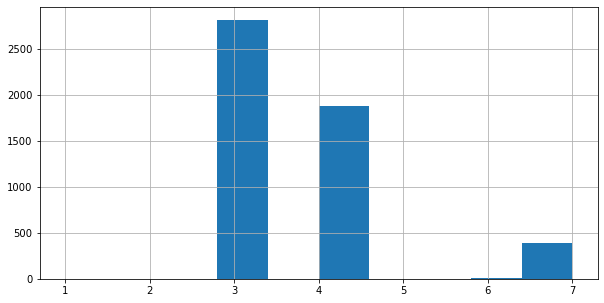

In [184]:
#Plot the histogram to see the frequency distribution of trusted judgements
dataframe["_trusted_judgments"].hist()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

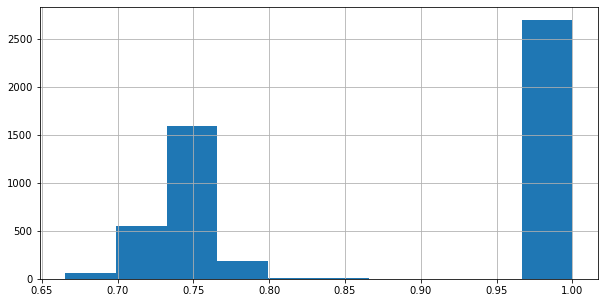

In [185]:
#Similar histogram for sentiment confidence
dataframe["sentiment:confidence"].hist()
plt.rcParams["figure.figsize"] = (10,5)
plt.show()

In [186]:
dataframe.isnull().sum()
#There are no null values in the text column of the data which will be required for the analysis

_unit_id                0
_golden                 0
_trusted_judgments      0
_last_judgment_at       2
sentiment               0
sentiment:confidence    0
our_id                  0
text                    0
dtype: int64

## 2. Tokenizing the words and showing most common words, nouns, punctuations and adjectives

In [187]:
#This function is used to tokenize the tweets and remove the stop words which may not be useful for analysis
from nltk.tokenize import TweetTokenizer
nlp=spacy.load('en_core_web_sm')
tokenizer = TweetTokenizer()

textData = []

for items in dataframe["text"]:
    textData.append(items)

tokenizedData = []
for data in textData:
    cleaned = [word.lower() for word in tokenizer.tokenize(data.lower()) if word not in nlp.Defaults.stop_words and len(word) > 2]
    tokenizedData.append(' '.join(cleaned))

tokenizedData

['audi carmaker license nevada dmv test automated vehicles #audi #ces #cartech',
 "audi says car manufacturer world license nevada dmv test autonomous vehicles google doesn't cars #ces",
 'audi test driving driverless car tampa today pretty cool',
 'audi automaker california test self-driving car @latimes @audi #selfdrivingcars http://t.co/wyscaloqef',
 '@latimesautos audi gets permit test self-driving cars california roads http://t.co/l71qpm42ly http://t.co/cwbboawahl̢���',
 'audi gets permit test self-driving cars california http://t.co/jkdtjsupwa',
 "google audi mercedes california's self-driving car test permits cars drivers soon ... http://t.co/mx9jx0rgxj",
 'audi gets permit test driverless cars california bay area drag queens ... http://t.co/bc5mlrrgej',
 'today state regs autonomous cars effect audi america gets 1st permit test driverless cars public roads @ca_dmv',
 'audi gets permit test self-driving cars california think twice time tailgate new audi ... http://t.co/jwtiom2nj

In [188]:
#Cleaning the data elements as there are links and hashtags present
cleanedData = []

for data in tokenizedData:
    data = (re.sub(r'http\S+', '', data))
    data = (re.sub(r"#\S+",'', data))
    cleanedData.append((re.sub(r'@\S+', '', data)))

cleanedData

['audi carmaker license nevada dmv test automated vehicles   ',
 "audi says car manufacturer world license nevada dmv test autonomous vehicles google doesn't cars ",
 'audi test driving driverless car tampa today pretty cool',
 'audi automaker california test self-driving car    ',
 ' audi gets permit test self-driving cars california roads  ',
 'audi gets permit test self-driving cars california ',
 "google audi mercedes california's self-driving car test permits cars drivers soon ... ",
 'audi gets permit test driverless cars california bay area drag queens ... ',
 'today state regs autonomous cars effect audi america gets 1st permit test driverless cars public roads ',
 'audi gets permit test self-driving cars california think twice time tailgate new audi ... ',
 'audi gets permit test driverless cars california bay area drag queens ... ',
 'audi gets permit test self-driving cars california ',
 'audi automaker given permit test self-driving cars   ',
 'audi snags permit test self-d

In [189]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_n_words(corpus, n=None):

    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(cleanedData, 10)
for word, freq in common_words:
    print(word, freq)

driving 3115
self 2979
car 2672
cars 2320
google 1938
driverless 1334
autonomous 276
future 225
like 195
saw 185


In [190]:
#Remove the most common words which are not relevant for analysis
search_word = ["self driving cars", "self driving car", "car", "cars", "self-driving", "driverless", \
                            "autonomous", "self driving", "self", "vehicle", "driver", "driving", "drivers", "roads", "road", "drive", "vehicles"]

filteredData=[]

# Split the text based on space and store the words in a list
for data in cleanedData:
    text_word = data.split()
    filter_text = ' '.join((filter(lambda val: val not in search_word, text_word)))
    filteredData.append(filter_text.lower())

filteredData

['audi carmaker license nevada dmv test automated',
 "audi says manufacturer world license nevada dmv test google doesn't",
 'audi test tampa today pretty cool',
 'audi automaker california test',
 'audi gets permit test california',
 'audi gets permit test california',
 "google audi mercedes california's test permits soon ...",
 'audi gets permit test california bay area drag queens ...',
 'today state regs effect audi america gets 1st permit test public',
 'audi gets permit test california think twice time tailgate new audi ...',
 'audi gets permit test california bay area drag queens ...',
 'audi gets permit test california',
 'audi automaker given permit test',
 'audi snags permit test california los angeles cbs audi ...',
 'agv automated guided trapac dock',
 'agv automated guided trapac dock',
 'agv automated guided trapac dock',
 'sae on-road automated standards committee open meeting',
 'transportation service model oems responsible automated control',
 'automated connected',
 

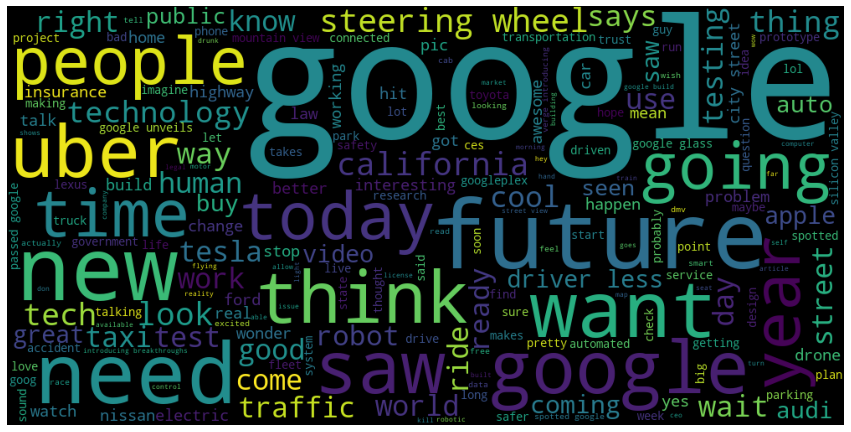

In [191]:
#Word cloud for overall words
unique_string=(" ").join(str(i) for i in filteredData)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("your_file_name"+".png", bbox_inches='tight')
plt.show()
plt.close()

In [192]:
#Create adjectives and nouns from data
doc = []
for filtereddata in filteredData:
  doc.append(nlp(filtereddata))

adj=[]
verbs=[]
nouns=[]

# Token and Tag
for eachDoc in doc:
  for token in eachDoc:
    if token.pos_ == 'ADJ':
      adj.append(token)
    if token.pos_ == 'NOUN':
      nouns.append(token)
    if token.pos_ == 'VERB':
      verbs.append(token)


In [193]:
adj_counter = Counter(adj)
verb_counter = Counter(verbs)
noun_counter = Counter(nouns)

In [194]:
#Punctuation based tokens
from nltk.tokenize import wordpunct_tokenize

punc_tokens = []

for docs in filteredData:
    punc_tokens.append(wordpunct_tokenize(docs))

punc_tokens

[['audi', 'carmaker', 'license', 'nevada', 'dmv', 'test', 'automated'],
 ['audi',
  'says',
  'manufacturer',
  'world',
  'license',
  'nevada',
  'dmv',
  'test',
  'google',
  'doesn',
  "'",
  't'],
 ['audi', 'test', 'tampa', 'today', 'pretty', 'cool'],
 ['audi', 'automaker', 'california', 'test'],
 ['audi', 'gets', 'permit', 'test', 'california'],
 ['audi', 'gets', 'permit', 'test', 'california'],
 ['google',
  'audi',
  'mercedes',
  'california',
  "'",
  's',
  'test',
  'permits',
  'soon',
  '...'],
 ['audi',
  'gets',
  'permit',
  'test',
  'california',
  'bay',
  'area',
  'drag',
  'queens',
  '...'],
 ['today',
  'state',
  'regs',
  'effect',
  'audi',
  'america',
  'gets',
  '1st',
  'permit',
  'test',
  'public'],
 ['audi',
  'gets',
  'permit',
  'test',
  'california',
  'think',
  'twice',
  'time',
  'tailgate',
  'new',
  'audi',
  '...'],
 ['audi',
  'gets',
  'permit',
  'test',
  'california',
  'bay',
  'area',
  'drag',
  'queens',
  '...'],
 ['audi', 'ge

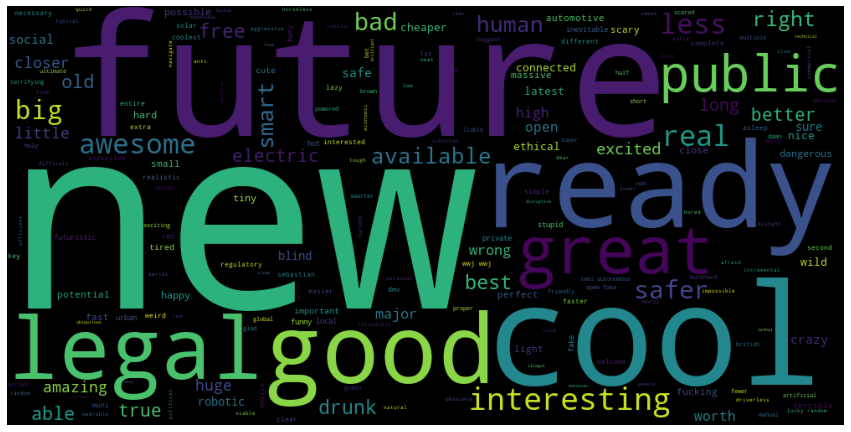

In [195]:
#Adjective tokens
unique_string=(" ").join(str(i) for i in adj)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

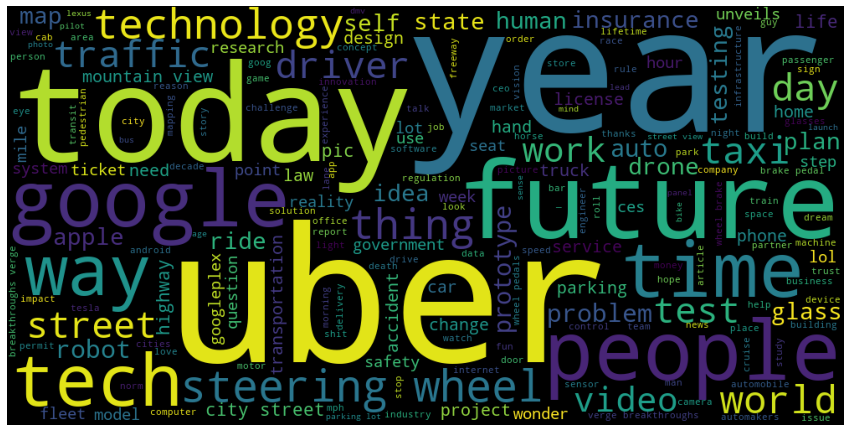

In [196]:
#Noun tokens
unique_string=(" ").join(str(i) for i in nouns)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

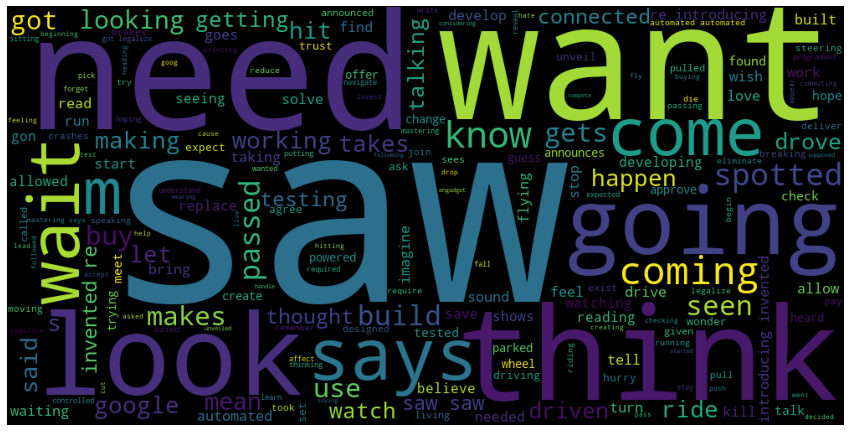

In [197]:
#Verbs tokens
unique_string=(" ").join(str(i) for i in verbs)
wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()
plt.close()

In [198]:
corpus = []
for filler in filteredData:
  corpus.append(nlp(filler))

corpus

[audi carmaker license nevada dmv test automated,
 audi says manufacturer world license nevada dmv test google doesn't,
 audi test tampa today pretty cool,
 audi automaker california test,
 audi gets permit test california,
 audi gets permit test california,
 google audi mercedes california's test permits soon ...,
 audi gets permit test california bay area drag queens ...,
 today state regs effect audi america gets 1st permit test public,
 audi gets permit test california think twice time tailgate new audi ...,
 audi gets permit test california bay area drag queens ...,
 audi gets permit test california,
 audi automaker given permit test,
 audi snags permit test california los angeles cbs audi ...,
 agv automated guided trapac dock,
 agv automated guided trapac dock,
 agv automated guided trapac dock,
 sae on-road automated standards committee open meeting,
 transportation service model oems responsible automated control,
 automated connected,
 wo2013070799a1 automated conveyance appa

In [199]:
#Lemmatizing the data points
lemmatizedData = []

for i in range(len(corpus)):
    value =[]
    for data in corpus[i]:
        value.append(("").join(data.lemma_))
    
    lemmatizedData.append(value)


3. Create a model using Vader. This model is a rule based analyser that is useful specifically for sentiment analysis in social media

In [200]:
import nltk
nltk.download('vader_lexicon')
  
sentimentAnalyser = SentimentIntensityAnalyzer()
polarity = []

for values in corpus:
    polarity.append(sentimentAnalyser.polarity_scores(values.text))



[nltk_data] Downloading package vader_lexicon to E:\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [201]:
#These are the polarity values that are computed by Vader model. The compound value gives us as to how negative or positive the tweet is on a scale of -1 to 1
polarity

compoundValues = []
for data in polarity:
    compoundValues.append(data.get("compound"))

compoundValues

[0.0,
 0.0,
 0.6705,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.2263,
 0.0,
 0.0,
 -0.2263,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3182,
 0.0,
 0.0,
 -0.3818,
 0.0,
 0.0,
 -0.3818,
 0.0,
 0.3612,
 0.0,
 0.0,
 0.3612,
 -0.2732,
 0.0,
 0.7906,
 0.0,
 0.0,
 0.0,
 0.4588,
 0.0,
 0.0,
 0.0,
 0.296,
 0.0,
 0.0,
 0.0,
 0.1779,
 0.0,
 0.0,
 0.296,
 -0.4404,
 0.4767,
 0.0,
 0.7783,
 0.0,
 0.0,
 0.128,
 0.7906,
 0.0,
 0.0,
 0.4215,
 0.0,
 0.0,
 -0.34,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3182,
 0.6249,
 0.0,
 0.0,
 0.4404,
 0.6705,
 0.0,
 0.4019,
 0.0,
 0.4019,
 0.4215,
 -0.296,
 0.0,
 0.0,
 0.3612,
 0.3182,
 0.0,
 0.6369,
 0.0,
 0.0,
 0.0,
 0.4767,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3182,
 0.0,
 0.891,
 0.0,
 0.0,
 -0.6597,
 0.5719,
 0.34,
 0.0,
 0.0,
 0.128,
 -0.2732,
 0.0,
 0.0,
 0.25,
 0.0,
 0.3182,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.3818,
 0.0,
 0.6597,
 0.0,
 0.5975,
 0.0,
 0.0,
 0.5574,
 0.0,
 0.0,
 0.0,
 -0.7269,
 -0.1027,
 0.6249,
 0.0,
 0.3182,
 0.4588,
 

In [202]:
processedDf = pd.DataFrame(filteredData, columns=["Tweets"])

In [203]:
processedDf['Score'] = compoundValues

In [204]:
processedDf["Lemma"] = lemmatizedData

In [205]:
processedDf

,Tweets,Score,Lemma
0,audi carmaker license nevada dmv test automated,0.0000,"[audi, carmaker, license, nevada, dmv, test, a..."
1,audi says manufacturer world license nevada dm...,0.0000,"[audi, say, manufacturer, world, license, neva..."
2,audi test tampa today pretty cool,0.6705,"[audi, test, tampa, today, pretty, cool]"
3,audi automaker california test,0.0000,"[audi, automaker, california, test]"
4,audi gets permit test california,0.0000,"[audi, get, permit, test, california]"
...,...,...,...
5083,ceo elon musk ceo huang discuss safety regulation,0.4215,"[ceo, elon, musk, ceo, huang, discuss, safety,..."
5084,bmw drift equally good professional drift good,0.7003,"[bmw, drift, equally, good, professional, drif..."
5085,new tesla d's autopilot read speed limit signs...,-0.1779,"[new, tesla, d, 's, autopilot, read, speed, li..."
5086,ran cat stink,-0.4019,"[run, cat, stink]"


In [206]:
#Neutral tweets
processedDf.loc[(processedDf['Score']>-0.05) & (processedDf['Score']<0.05),'Score'] = 3
neutral = processedDf[processedDf["Score"]==3]
neutral

,Tweets,Score,Lemma
0,audi carmaker license nevada dmv test automated,3.0,"[audi, carmaker, license, nevada, dmv, test, a..."
1,audi says manufacturer world license nevada dm...,3.0,"[audi, say, manufacturer, world, license, neva..."
3,audi automaker california test,3.0,"[audi, automaker, california, test]"
4,audi gets permit test california,3.0,"[audi, get, permit, test, california]"
5,audi gets permit test california,3.0,"[audi, get, permit, test, california]"
...,...,...,...
5075,price double volvo release 2017,3.0,"[price, double, volvo, release, 2017]"
5076,news nxpi acquiring fsl carlyle group similar ...,3.0,"[news, nxpi, acquire, fsl, carlyle, group, sim..."
5077,volvo hit swedish,3.0,"[volvo, hit, swedish]"
5081,nvidia's developer platform available 2015 000,3.0,"[nvidia, 's, developer, platform, available, 2..."


In [207]:
#Positive tweets
processedDf.loc[(processedDf['Score']>=0.05) & (processedDf['Score']<0.60), 'Score'] = 4
positive = processedDf[processedDf["Score"]==4]
positive

,Tweets,Score,Lemma
18,transportation service model oems responsible ...,4.0,"[transportation, service, model, oem, responsi..."
26,thank gods automated condition evaluation kits,4.0,"[thank, god, automate, condition, evaluation, ..."
29,california's new automated regulations smartly...,4.0,"[california, 's, new, automate, regulation, sm..."
36,dematic introduces pallet delivery automated g...,4.0,"[dematic, introduce, pallet, delivery, automat..."
40,yeah reason automated drink,4.0,"[yeah, reason, automate, drink]"
...,...,...,...
5063,think big piece puzzle creating app store,4.0,"[think, big, piece, puzzle, create, app, store]"
5064,dad's mexican cowboy looking tiny truck funny ...,4.0,"[dad, 's, mexican, cowboy, look, tiny, truck, ..."
5070,smart street furniture designs year nominated,4.0,"[smart, street, furniture, design, year, nomin..."
5080,sounds like nvidia's new gpu big implications,4.0,"[sound, like, nvidia, 's, new, gpu, big, impli..."


In [208]:
#Negative tweets
processedDf.loc[(processedDf["Score"]<=-0.05) & (processedDf["Score"]>-0.60), 'Score']= 2
negative = processedDf[processedDf["Score"]==2]
negative

,Tweets,Score,Lemma
7,audi gets permit test california bay area drag...,2.0,"[audi, get, permit, test, california, bay, are..."
10,audi gets permit test california bay area drag...,2.0,"[audi, get, permit, test, california, bay, are..."
21,automated supposed behave emergency,2.0,"[automate, suppose, behave, emergency]"
24,automated supposed behave emergency,2.0,"[automate, suppose, behave, emergency]"
30,year google warned automated commercialized pr...,2.0,"[year, google, warn, automate, commercialize, ..."
...,...,...,...
5078,mwc nokia ceo cites home healthcare attack net...,2.0,"[mwc, nokia, ceo, cite, home, healthcare, atta..."
5079,stumbled photo shoot mercedesbenz prototype tw...,2.0,"[stumble, photo, shoot, mercedesbenz, prototyp..."
5082,elon musk believes 50mph solved problem,2.0,"[elon, musk, believe, 50, mph, solve, problem]"
5085,new tesla d's autopilot read speed limit signs...,2.0,"[new, tesla, d, 's, autopilot, read, speed, li..."


In [209]:
#Extremely positive tweets
processedDf.loc[processedDf["Score"]>0.60, 'Score'] = 5
extremePositive = processedDf[processedDf["Score"]==5]
extremePositive

,Tweets,Score,Lemma
0,audi carmaker license nevada dmv test automated,5.0,"[audi, carmaker, license, nevada, dmv, test, a..."
1,audi says manufacturer world license nevada dm...,5.0,"[audi, say, manufacturer, world, license, neva..."
2,audi test tampa today pretty cool,5.0,"[audi, test, tampa, today, pretty, cool]"
3,audi automaker california test,5.0,"[audi, automaker, california, test]"
4,audi gets permit test california,5.0,"[audi, get, permit, test, california]"
...,...,...,...
5083,ceo elon musk ceo huang discuss safety regulation,5.0,"[ceo, elon, musk, ceo, huang, discuss, safety,..."
5084,bmw drift equally good professional drift good,5.0,"[bmw, drift, equally, good, professional, drif..."
5085,new tesla d's autopilot read speed limit signs...,5.0,"[new, tesla, d, 's, autopilot, read, speed, li..."
5086,ran cat stink,5.0,"[run, cat, stink]"


In [210]:
#Extremely negative tweets
processedDf.loc[processedDf["Score"]<-0.60, 'Score'] = 1
extremeNegative = processedDf[processedDf["Score"]==1]
extremeNegative

,Tweets,Score,Lemma
103,whilst think solve you'd wrong i'm terrible na...,1.0,"[whilst, think, solve, you, 'd, wrong, I, be, ..."
135,stupid able write damn research paper,1.0,"[stupid, able, write, damn, research, paper]"
147,selectable ethics bad hate setting,1.0,"[selectable, ethic, bad, hate, set]"
363,article fails raise possible use bombings war ...,1.0,"[article, fail, raise, possible, use, bombing,..."
415,it's odd people scared drunk people don't like...,1.0,"[it, be, odd, people, scare, drunk, people, do..."
...,...,...,...
4954,google's rumored ride-share service terrify <-...,1.0,"[google, 's, rumor, ride, -, share, service, t..."
4974,mark ritchie-self-driving tech prevented death...,1.0,"[mark, ritchie, -, self, -, drive, tech, preve..."
5018,google uber going war taxis,1.0,"[google, uber, go, war, taxi]"
5022,uber google reportedly war taxis updated ars t...,1.0,"[uber, google, reportedly, war, taxi, update, ..."


Based on the evaluation it can be seen that the data is imbalanced as the data consists of positive tweets 
Also vader gives an accuracy score for each of the sentiment individually which states how positive/negative the tweet is.
This is very simple approach.

In [211]:
Counter(" ".join(extremeNegative["Tweets"]).split()).most_common(10)
#Below it is evident that there is negative sentiment considering there are words with extreme negative connotation

[('google', 32),
 ('people', 14),
 ('like', 9),
 ('...', 9),
 ('accident', 9),
 ('kill', 9),
 ('shit', 8),
 ('going', 8),
 ("it's", 7),
 ("don't", 7)]

In [212]:
Counter(" ".join(extremePositive["Tweets"]).split()).most_common(10)
#Below it is evident that there is positive sentiment considering there are words with extreme positive connotation

[('google', 1472),
 ('...', 483),
 ("google's", 353),
 ('future', 220),
 ('saw', 185),
 ('like', 183),
 ('new', 174),
 ('need', 132),
 ('uber', 131),
 ('california', 128)]

In [213]:
Counter(" ".join(positive["Tweets"]).split()).most_common(10)
#Like is a positive word hence this can be a common word in these tweets

[('google', 331),
 ('...', 123),
 ('like', 120),
 ("google's", 90),
 ('want', 74),
 ('future', 53),
 ('cool', 47),
 ('new', 45),
 ("i'm", 45),
 ('california', 42)]

In [214]:
Counter(" ".join(negative["Tweets"]).split()).most_common(10)
#Problem word is slightly negative hence is common here

[('google', 172),
 ('...', 64),
 ("google's", 51),
 ('think', 27),
 ('need', 25),
 ('stop', 25),
 ('future', 23),
 ('going', 23),
 ('problem', 22),
 ('new', 22)]

In [215]:
Counter(" ".join(neutral["Tweets"]).split()).most_common(10)
#Neutral words

[('google', 889),
 ('...', 266),
 ("google's", 192),
 ('future', 129),
 ('saw', 123),
 ('new', 93),
 ('uber', 82),
 ('california', 75),
 ('wheel', 71),
 ('need', 67)]

If we are to improve the accuracy with which we predict the sentiment we need to use data which is balanced, which contains equal number of positive and negative tweets as we are considering unsupervised learning.
The model will not be biased if it contains almost equal number of sentiment data points

In [216]:
processedDf['Sentiment'] = dataframe['sentiment']

In [217]:
processedDf['Sentiment'] = processedDf['Sentiment'].fillna(0)

3. Naive Bayes Classification

In [218]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
tokenized_tweets = vectorizer.fit_transform(processedDf['Tweets'])

In [219]:
X = tokenized_tweets

In [220]:
y = dataframe['sentiment']

In [221]:
print(X.shape)
print(y.shape)

(5088, 6520)
(5088,)


In [222]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [223]:
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, y_train)

MultinomialNB()

In [224]:
#Prediciting the test results
y_predict_test = NB_classifier.predict(X_test)

4. Evalutaion of model on each sentiment

In [225]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         7
           2       0.26      0.12      0.16        92
           3       0.73      0.90      0.80       674
           4       0.46      0.33      0.39       189
           5       0.33      0.05      0.08        43
not_relevant       0.00      0.00      0.00        13

    accuracy                           0.67      1018
   macro avg       0.30      0.23      0.24      1018
weighted avg       0.60      0.67      0.62      1018



In [226]:
#Prediciting the test results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
cm

array([[  0,   3,   4,   0,   0,   0],
       [  0,  11,  70,  11,   0,   0],
       [  0,  21, 604,  45,   3,   1],
       [  0,   3, 122,  63,   1,   0],
       [  0,   0,  25,  16,   2,   0],
       [  0,   4,   7,   2,   0,   0]], dtype=int64)

The model does not perform well on all the ratings as it can be seen from the classification report that the data is very biased and contains maximum number of tweets with neutral and positive sentiment. Hence the data is imbalanced.

Also the data contains alot of noise hence more cleaning and techniques like Term frequency and Inverse Document frequency can be used to eliminate words which are not relevant to analysis

To improve the model further we need more data as well which would be balanced

Overall from the data it can be seen that people are very excited about the self driving cars and the advancement made by companies like Google, Uber are contributing factors to the general sentiment on social media. As a company this is a positive sign that all the advancements are very well received by general public and hence innovations in the self driving car needs to continue.